# importing libraries

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load dataset 

In [37]:
df=pd.read_csv('heart.csv',encoding ='latin-1')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# preprocessing data

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [39]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# used one -hot encoding 

In [40]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']
x_encoded=pd.get_dummies(x,columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.2,random_state=42)
print(x_encoded.columns)


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [41]:
scaler=StandardScaler()
x_train_scal= scaler.fit_transform(x_train)
x_test_scal=scaler.transform(x_test)

# model (logistic )

In [43]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train_scal,y_train)
log_pred=logistic_model.predict(x_test_scal)
log_accu=accuracy_score(y_test,log_pred)


# knn 

In [47]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train_scal,y_train)
knn_pred=knn_model.predict(x_test_scal)
knn_accu=accuracy_score(y_test,knn_pred)

# random forest 


In [52]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scal, y_train)
rf_pred = rf_model.predict(x_test_scal)
rf_accu = accuracy_score(y_test, rf_pred)

In [54]:
print("logistic",log_accu)
print("knn",knn_accu)
print("randomforest",rf_accu)

logistic 0.8532608695652174
knn 0.8532608695652174
randomforest 0.8695652173913043


C:\Users\HP\AppData\Local\Temp\ipykernel_11672\3781452075.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


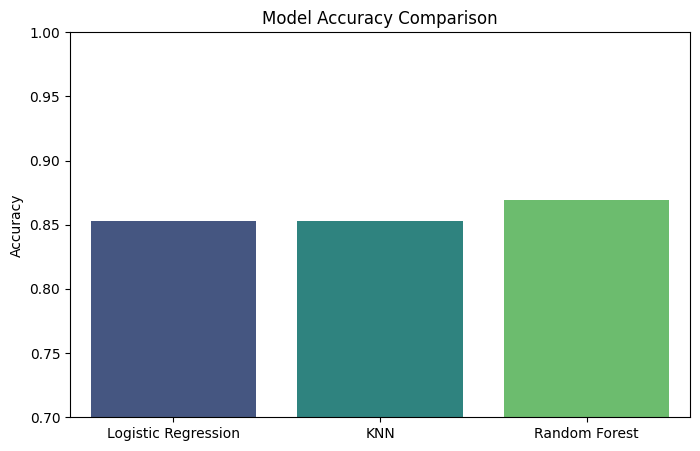

In [55]:

models = ['Logistic Regression', 'KNN', 'Random Forest']
accuracies = [log_accu, knn_accu, rf_accu]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.show()

In [57]:
print("classification report")
print("logistic",classification_report(y_test,log_pred))

classification report
logistic               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [58]:
print("classification report")
print("randomforest",classification_report(y_test,rf_pred))

classification report
randomforest               precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [59]:
print("classification report")
print("knn",classification_report(y_test,knn_pred))

classification report
knn               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



# confusion matrix

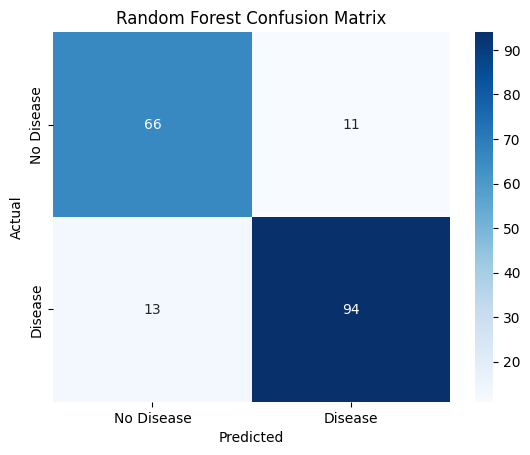

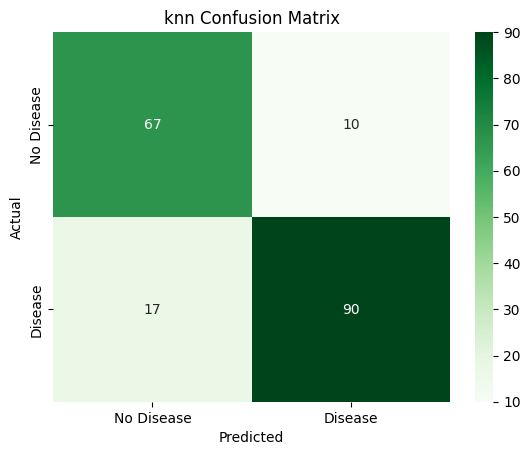

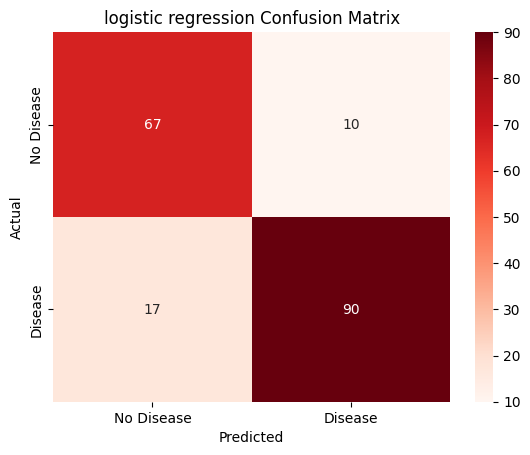

In [79]:
conf_mat = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

conf_mat = confusion_matrix(y_test, knn_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('knn Confusion Matrix')
plt.show()

conf_mat = confusion_matrix(y_test, log_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('logistic regression Confusion Matrix')
plt.show()

# roc curve 

In [61]:
log_pro=logistic_model.predict_proba(x_test_scal)[:,1]
knn_pro=knn_model.predict_proba(x_test_scal)[:,1]
rf_pro=rf_model.predict_proba(x_test_scal)[:,1]

In [68]:
fpr_log, tpr_log, _ = roc_curve(y_test, log_pro)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_pro)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pro)
auc_log = roc_auc_score(y_test, log_pro)
auc_knn = roc_auc_score(y_test, knn_pro)
auc_rf = roc_auc_score(y_test, rf_pro)
roc_area=[auc_log,auc_knn,auc_rf]

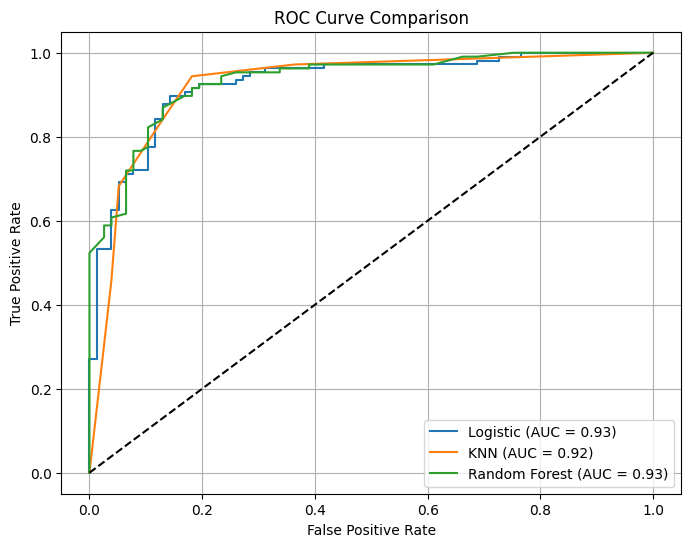

In [69]:
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic (AUC = {auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [71]:
best_model_name = models[accuracies.index(max(accuracies))]
print(" Best Model Based on Accuracy:", best_model_name)
best_model_name = models[roc_area.index(max(roc_area))]
print(" Best Model Based on roc area :", best_model_name)



 Best Model Based on Accuracy: Random Forest
 Best Model Based on roc area : Random Forest


# test

In [72]:
def predict_disease(input_data, model, scaler, reference_columns):
    import pandas as pd
    df = pd.DataFrame([input_data])
    df_encoded = pd.get_dummies(df)
    for col in reference_columns:
        if col not in df_encoded.columns:
            df_encoded[col] = 0
    df_encoded = df_encoded[reference_columns]
    df_scaled = scaler.transform(df_encoded)
    prediction = model.predict(df_scaled)[0]
    return "Heart Disease" if prediction == 1 else "No Disease"


In [75]:
new_patient = {
    'Age': 29,
    'Sex': 'F',
    'ChestPainType': 'NAP',          # Non-anginal pain (least risky)
    'RestingBP': 115,                # Normal resting blood pressure
    'Cholesterol': 180,              # Healthy cholesterol
    'FastingBS': 0,                  # Normal fasting blood sugar
    'RestingECG': 'Normal',          # Normal ECG
    'MaxHR': 172,                    # High max heart rate (good fitness)
    'ExerciseAngina': 'N',           # No exercise-induced angina
    'Oldpeak': 0.0,                  # No ST depression
    'ST_Slope': 'Up'                 # Up-sloping ST segment (least risky)
}
result = predict_disease(new_patient, rf_model, scaler, x_encoded.columns)
print("Prediction:", result)


Prediction: No Disease
